## Automatic Differentition by Zygote

In [141]:
using Zygote

f(x) = sin(x)
println("sin(x): ", map(x -> f(x), [0, π/2, π]))

df_ad(x) = gradient(f, x)[1]
println("dsin(x)/dx = cos(x): ", map(x -> df_ad(x), [0, π/2, π]))

sin(x): [0.0, 1.0, 1.2246467991473532e-16]
dsin(x)/dx = cos(x): [1.0, 6.123233995736766e-17, -1.0]


## Symbolic Differentiation by Symbolics

In [142]:
using Symbolics

@variables x
y = expand_derivatives(Differential(x)(sin(x)))
println("dsin(x)/dx = ", y)
println(substitute.(y, map(th -> Dict(x=>th), [0, π/2, π])))

dsin(x)/dx = cos(x)
Num[1.0, 6.123233995736766e-17, -1.0]


## Numerical Differentiation by Symbolics

In [168]:
df_fd(x,h) = (f(x+h) - f(x-h)) / 2h
println("dsin(x)/dx = cos(x): ", map(x -> df_fd(x,1e-6), [0, π/2, π]))

dsin(x)/dx = cos(x): [0.9999999999998334, 0.0, -1.0000000001396114]


## Comparision by Plots

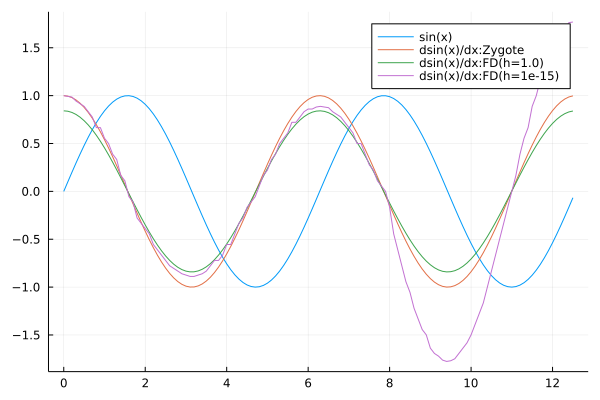

In [189]:
using Plots

x = 0:0.1:4*π
y1 = map(x -> f(x), x)
y2 = map(x -> df_ad(x), x)
y3 = map(x -> df_fd(x,1.0), x)
y4 = map(x -> df_fd(x,1e-15), x)
y = hcat(y1, y2, y3, y4)
plot(x,y,label=["sin(x)" "dsin(x)/dx:Zygote" "dsin(x)/dx:FD(h=1.0)" "dsin(x)/dx:FD(h=1e-15)"])